> ## **Métodos Computacionales II - Primer Parcial**

**Hecho por:** Thomas Andrade Hernández (202214695) & Juan Carlos Rojas V. (202214037)

---

In [3]:
# Zona de librerías:
%matplotlib notebook
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as anim
from scipy import integrate
from tqdm import tqdm
import random as rnd
import math as math
import scipy as sci

**Falling Rod:**

**(a)** Aplique la segunda Ley de Newton para entoncar $$m\ddot{y} = N - mg$$

In [73]:
g = -9.81
L = 1
def ddtheta(theta,dtheta):
    return (2*g/L-dtheta**2*np.cos(theta))*np.sin(theta)/(1/3 + np.sin(theta)**2)

def ddotthetadt(theta,dtheta):
    return (2*g/L-dtheta**2*np.cos(theta))*np.sin(theta)/(1/3 + np.sin(theta)**2)

def theta(theta,dtheta,ddtheta,t):
    return theta + dtheta*t + 0.5*ddtheta*t**2
    

def GetEuler2System(f0,f1,init_cond,t):
    
    h = t[1] - t[0]
    theta = np.zeros_like(t)
    dtheta = np.zeros_like(t)

    
    # Initial condition
    theta[0] = init_cond[0]
    dtheta[0] = init_cond[1]
    
    # Vectorizacion de las pendientes
    K1 = np.zeros(3)
    K2 = np.zeros(3)
    
    for i in range(1,len(t)):
        
        K1[0] = f0(theta[i-1],dtheta[i-1],ddotthetadt(theta[i-1],dtheta[i-1]),t[i-1])
        K1[1] = f1(theta[i-1],dtheta[i-1])
            
        K2[0] = f0(theta[i-1]+h*K1[0],dtheta[i-1]+h*K1[1],ddotthetadt(theta[i-1]+h*K1[0],dtheta[i-1]+h*K1[1]),t[i-1])
        K2[1] = f1(theta[i-1]+h*K1[0],dtheta[i-1]+h*K1[1])
        
        
        
        theta[i] = theta[i-1] + 0.5*h*(K1[0]+K2[0])
        print(dtheta[i])
        dtheta[i] = dtheta[i-1] + 0.5*h*(K1[1]+K2[1])
        print(dtheta[i])
        
    return theta,dtheta
    
r0 = np.array([10*(np.pi)/180, 0]) 
t = np.linspace(0,1.5)

theta,dtheta = GetEuler2System(theta,ddtheta,r0,t)

0.0
-0.291131703660144
0.0
-0.5919505845504748
0.0
-0.904251227576516
0.0
-1.2290228222837354
0.0
-1.5661067638398376
0.0
-1.9134802309100496
0.0
-2.2659867109230394
0.0
-2.613396032394647
0.0
-2.938112420653962
0.0
-3.2140742488245344
0.0
-3.4100982113392155
0.0
-3.5000771203827266
0.0
-3.4754127864942057
0.0
-3.34894462813335
0.0
-3.1471216724436504
0.0
-2.8987574053432703
0.0
-2.6280730363204916
0.0
-2.3528336206339286
0.0
-2.0851729188798407
0.0
-1.833092044237358
0.0
-1.6017186829643197
0.0
-1.3941084071500334
0.0
-1.2116702490617985
0.0
-1.0543946153237578
0.0
-0.9210535043323141
0.0
-0.8094722898440945
0.0
-0.7168801813250268
0.0
-0.6402805631319983
0.0
-0.5767679040256154
0.0
-0.523744059289146
0.0
-0.47902520572707236
0.0
-0.4408593967621935
0.0
-0.4078867079771932
0.0
-0.3790724503139995
0.0
-0.353635588253216
0.0
-0.330984929409529
0.0
-0.31066801308984904
0.0
-0.29233287731121954
0.0
-0.27570065177504494
0.0
-0.26054634476088706
0.0
-0.24668544997031125
0.0
-0.2339645420450

<IPython.core.display.Javascript object>


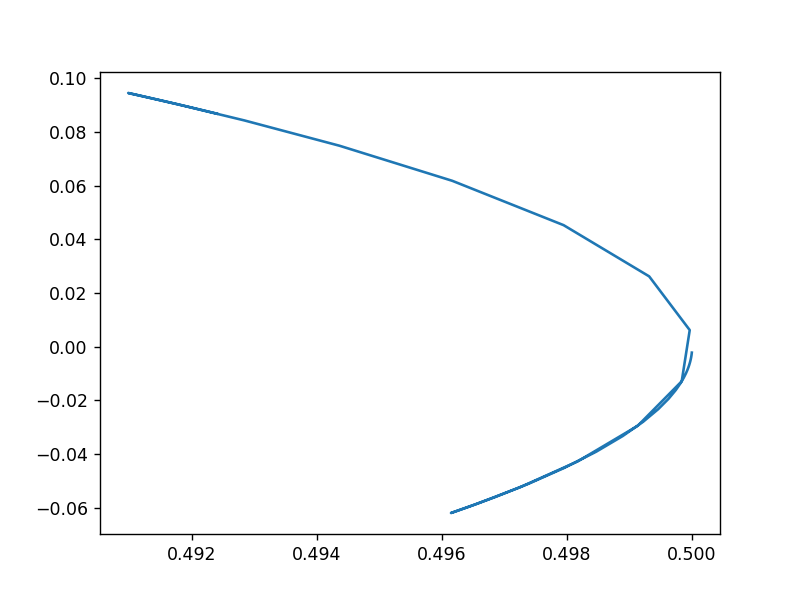

In [67]:
x = (L/2)*np.sin(np.pi/2-theta)
y = (L/2)*np.cos(np.pi/2-theta)
plt.plot(x,y)